In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df  = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#input data
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
#output data 
y = df['Exited']

In [8]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

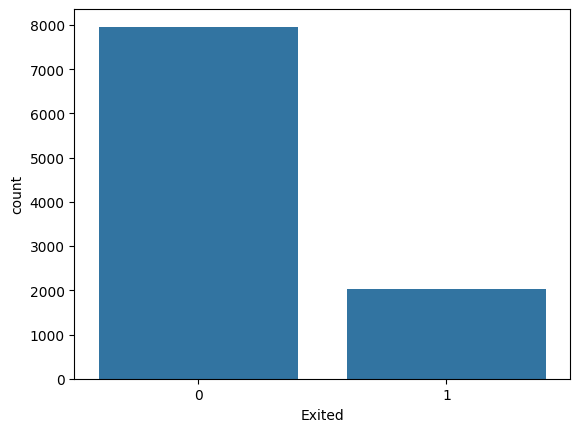

In [10]:
sns.countplot(x=y)

In [11]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
ros = RandomOverSampler()

In [15]:
x_res,y_res = ros.fit_resample(x,y);

In [16]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [17]:
#Normalize
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
x_scaled = scaler.fit_transform(x_res)

In [20]:
x_scaled

array([[-0.29983637,  0.08164761, -1.02530182, ...,  0.64988097,
         1.08456336,  0.01959808],
       [-0.41172264, -0.01253069, -1.36911276, ..., -1.53874333,
         1.08456336,  0.21319388],
       [-1.48989941,  0.08164761,  1.03756382, ...,  0.64988097,
        -0.92203005,  0.23721656],
       ...,
       [-1.12372617,  0.74089571,  1.38137476, ..., -1.53874333,
        -0.92203005,  1.27228627],
       [ 0.16805166,  0.17582591, -1.02530182, ...,  0.64988097,
        -0.92203005, -1.11683941],
       [-1.3983561 , -0.10670899,  1.38137476, ...,  0.64988097,
        -0.92203005,  1.70526813]])

In [21]:
#cross-validation
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_res,random_state=0,test_size=0.25);

In [23]:
x.shape

(10000, 8)

In [24]:
x_test.shape

(3982, 8)

In [25]:
x_train.shape

(11944, 8)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')

In [28]:
ann.fit(x_train,y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [29]:
y_pred = ann.predict(x_test)

In [30]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [32]:
y_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

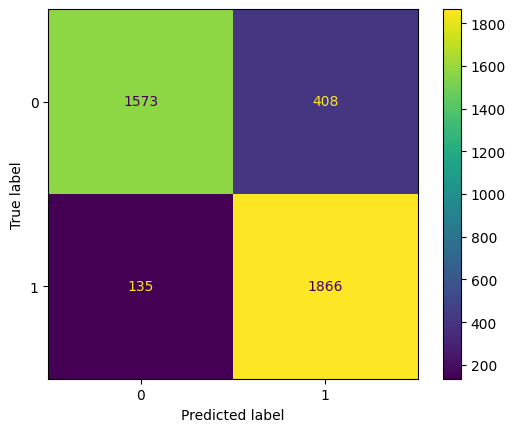

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [34]:
accuracy_score(y_test,y_pred)

0.8636363636363636

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1981
           1       0.82      0.93      0.87      2001

    accuracy                           0.86      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.86      0.86      3982

